# Etude et Expérimentations sur l'architecture MLP : Résolution de problèmes non-linéaires (moons, blobs et échiquier) et classification de chiffres manuscrits

## I. Moons : 2 classes en demi lune

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from modules import Sequential, Linear, Tanh, LogSoftmax, Sigmoide
from losses import NLLLoss, BCELoss, MSELoss
from optimizer import SGD


import pandas as pd
from IPython.display import display

In [ ]:
# Précision
def accuracy(model, X, y):
    y_pred = model.forward(X)
    pred = np.argmax(y_pred, axis=1)
    true = np.argmax(y, axis=1)
    return np.mean(pred == true)



# Visualisation de la frontière de décision 
def plot_decision_boundary(model, X, y, title):
    h = 0.1  # taille du pas de la grille
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.forward(grid)
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.show()
    


In [80]:
# Géneration des données 
X, y = make_moons(n_samples=1000, noise=0.4, random_state=0)
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Modèle 1 : Perceptron 

In [85]:
# Modèle : données 2D et sortie 2 classes
perceptron = Sequential(
    Linear(2, 2),
    LogSoftmax()
)


loss = NLLLoss() # choix du Loss analogue a la softmax
#Entrainement
losses_p = SGD(perceptron, loss, X_train, y_train, eps=0.1, batch_size=16, n_epochs=100)

print(f"Accuracy Perceptron en train : {accuracy(perceptron, X_train, y_train) * 100:.2f}%")
print(f"Accuracy Perceptron en test: {accuracy(perceptron, X_test, y_test) * 100:.2f}%")

Epoch 1/100, Loss: 0.4353
Epoch 2/100, Loss: 0.3936
Epoch 3/100, Loss: 0.3888
Epoch 4/100, Loss: 0.4017
Epoch 5/100, Loss: 0.3916
Epoch 6/100, Loss: 0.3858
Epoch 7/100, Loss: 0.3907
Epoch 8/100, Loss: 0.3868
Epoch 9/100, Loss: 0.3822
Epoch 10/100, Loss: 0.3955
Epoch 11/100, Loss: 0.3968
Epoch 12/100, Loss: 0.3933
Epoch 13/100, Loss: 0.3849
Epoch 14/100, Loss: 0.3911
Epoch 15/100, Loss: 0.3950
Epoch 16/100, Loss: 0.3952
Epoch 17/100, Loss: 0.3924
Epoch 18/100, Loss: 0.3949
Epoch 19/100, Loss: 0.3914
Epoch 20/100, Loss: 0.3890
Epoch 21/100, Loss: 0.3864
Epoch 22/100, Loss: 0.3877
Epoch 23/100, Loss: 0.3831
Epoch 24/100, Loss: 0.3875
Epoch 25/100, Loss: 0.3906
Epoch 26/100, Loss: 0.3984
Epoch 27/100, Loss: 0.3913
Epoch 28/100, Loss: 0.3891
Epoch 29/100, Loss: 0.3879
Epoch 30/100, Loss: 0.3909
Epoch 31/100, Loss: 0.3884
Epoch 32/100, Loss: 0.3849
Epoch 33/100, Loss: 0.3898
Epoch 34/100, Loss: 0.3891
Epoch 35/100, Loss: 0.3999
Epoch 36/100, Loss: 0.3944
Epoch 37/100, Loss: 0.3975
Epoch 38/1

#### Visualisation de la frontière de décision

In [88]:
plot_decision_boundary(perceptron, X_test, y_test, "Perceptron - Données non linéaires")

ValueError: cannot reshape array of size 7344 into shape (54,68)

### Modèles Profonds 

Epoch 1/100, Loss: 0.7968
Epoch 2/100, Loss: 0.5372
Epoch 3/100, Loss: 0.4495
Epoch 4/100, Loss: 0.5209
Epoch 5/100, Loss: 0.4273
Epoch 6/100, Loss: 0.3762
Epoch 7/100, Loss: 0.4030
Epoch 8/100, Loss: 0.3887
Epoch 9/100, Loss: 0.4032
Epoch 10/100, Loss: 0.4246
Epoch 11/100, Loss: 0.4080
Epoch 12/100, Loss: 0.3785
Epoch 13/100, Loss: 0.3552
Epoch 14/100, Loss: 0.3650
Epoch 15/100, Loss: 0.4077
Epoch 16/100, Loss: 0.3841
Epoch 17/100, Loss: 0.3854
Epoch 18/100, Loss: 0.3857
Epoch 19/100, Loss: 0.3563
Epoch 20/100, Loss: 0.3647
Epoch 21/100, Loss: 0.3673
Epoch 22/100, Loss: 0.3676
Epoch 23/100, Loss: 0.3689
Epoch 24/100, Loss: 0.3719
Epoch 25/100, Loss: 0.3809
Epoch 26/100, Loss: 0.3730
Epoch 27/100, Loss: 0.3724
Epoch 28/100, Loss: 0.3869
Epoch 29/100, Loss: 0.3636
Epoch 30/100, Loss: 0.3839
Epoch 31/100, Loss: 0.3645
Epoch 32/100, Loss: 0.3550
Epoch 33/100, Loss: 0.3656
Epoch 34/100, Loss: 0.3766
Epoch 35/100, Loss: 0.3899
Epoch 36/100, Loss: 0.3807
Epoch 37/100, Loss: 0.3789
Epoch 38/1

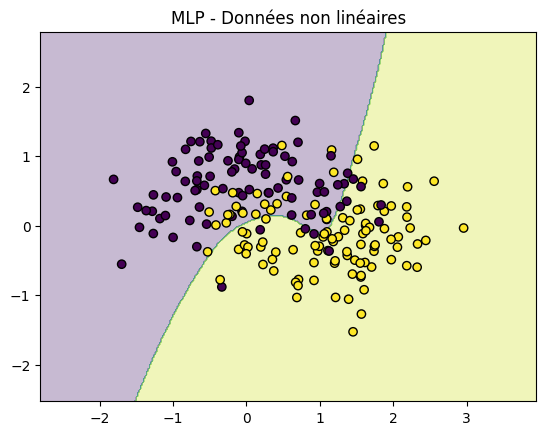

In [19]:
mlp = Sequential(
    Linear(2, 10),
    Tanh(),
    Linear(10, 2),
    LogSoftmax()
)
loss_mlp = NLLLoss()
losses_mlp = SGD(mlp, loss_mlp, X_train, y_train, eps=0.1, batch_size=16, n_epochs=100)

print(f"Accuracy MLP en train : {accuracy(mlp, X_train, y_train) * 100:.2f}%")
print(f"Accuracy MLP en test       : {accuracy(mlp, X_test, y_test) * 100:.2f}%")

plot_decision_boundary(mlp, X_test, y_test, "MLP - Données non linéaires")

Epoch 1/100, Loss: 0.6108
Epoch 2/100, Loss: 0.3831
Epoch 3/100, Loss: 0.3764
Epoch 4/100, Loss: 0.3846
Epoch 5/100, Loss: 0.3771
Epoch 6/100, Loss: 0.3721
Epoch 7/100, Loss: 0.3762
Epoch 8/100, Loss: 0.3700
Epoch 9/100, Loss: 0.3691
Epoch 10/100, Loss: 0.3754
Epoch 11/100, Loss: 0.3752
Epoch 12/100, Loss: 0.3720
Epoch 13/100, Loss: 0.3650
Epoch 14/100, Loss: 0.3651
Epoch 15/100, Loss: 0.3685
Epoch 16/100, Loss: 0.3657
Epoch 17/100, Loss: 0.3631
Epoch 18/100, Loss: 0.3620
Epoch 19/100, Loss: 0.3595
Epoch 20/100, Loss: 0.3553
Epoch 21/100, Loss: 0.3555
Epoch 22/100, Loss: 0.3544
Epoch 23/100, Loss: 0.3511
Epoch 24/100, Loss: 0.3494
Epoch 25/100, Loss: 0.3531
Epoch 26/100, Loss: 0.3545
Epoch 27/100, Loss: 0.3496
Epoch 28/100, Loss: 0.3472
Epoch 29/100, Loss: 0.3438
Epoch 30/100, Loss: 0.3466
Epoch 31/100, Loss: 0.3397
Epoch 32/100, Loss: 0.3375
Epoch 33/100, Loss: 0.3396
Epoch 34/100, Loss: 0.3396
Epoch 35/100, Loss: 0.3466
Epoch 36/100, Loss: 0.3414
Epoch 37/100, Loss: 0.3433
Epoch 38/1

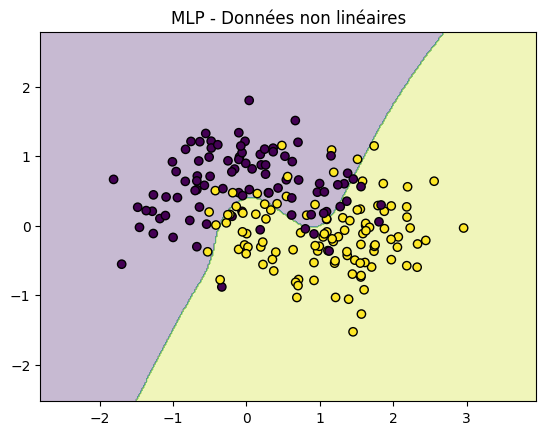

In [20]:
mlp = Sequential(
    Linear(2, 10),
    Tanh(),
    Linear(10, 2),
    LogSoftmax()
)
loss_mlp = NLLLoss()
losses_mlp = SGD(mlp, loss_mlp, X_train, y_train, eps=0.01, batch_size=16, n_epochs=100)

print(f"Accuracy MLP en train : {accuracy(mlp, X_train, y_train) * 100:.2f}%")
print(f"Accuracy MLP en test       : {accuracy(mlp, X_test, y_test) * 100:.2f}%")
plot_decision_boundary(mlp, X_test, y_test, "MLP - Données non linéaires")

Epoch 1/100, Loss: 0.4981
Epoch 2/100, Loss: 0.4195
Epoch 3/100, Loss: 0.4094
Epoch 4/100, Loss: 0.4165
Epoch 5/100, Loss: 0.4283
Epoch 6/100, Loss: 0.4112
Epoch 7/100, Loss: 0.4192
Epoch 8/100, Loss: 0.3996
Epoch 9/100, Loss: 0.3754
Epoch 10/100, Loss: 0.3777
Epoch 11/100, Loss: 0.3863
Epoch 12/100, Loss: 0.3692
Epoch 13/100, Loss: 0.3500
Epoch 14/100, Loss: 0.3619
Epoch 15/100, Loss: 0.3667
Epoch 16/100, Loss: 0.3499
Epoch 17/100, Loss: 0.3562
Epoch 18/100, Loss: 0.3392
Epoch 19/100, Loss: 0.3578
Epoch 20/100, Loss: 0.3587
Epoch 21/100, Loss: 0.3527
Epoch 22/100, Loss: 0.3468
Epoch 23/100, Loss: 0.3531
Epoch 24/100, Loss: 0.3508
Epoch 25/100, Loss: 0.3687
Epoch 26/100, Loss: 0.3519
Epoch 27/100, Loss: 0.3597
Epoch 28/100, Loss: 0.3739
Epoch 29/100, Loss: 0.3424
Epoch 30/100, Loss: 0.3637
Epoch 31/100, Loss: 0.3529
Epoch 32/100, Loss: 0.3474
Epoch 33/100, Loss: 0.3338
Epoch 34/100, Loss: 0.3479
Epoch 35/100, Loss: 0.3511
Epoch 36/100, Loss: 0.3520
Epoch 37/100, Loss: 0.3487
Epoch 38/1

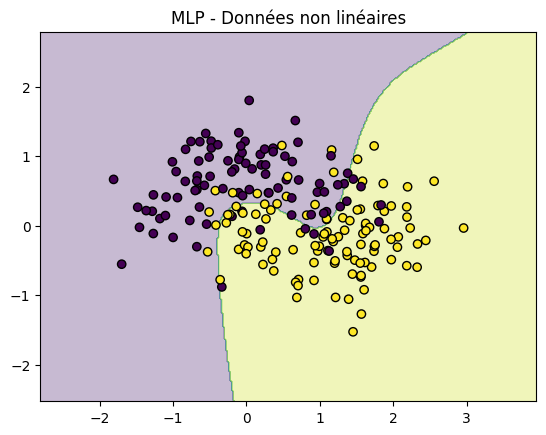

In [ ]:
mlp = Sequential(
    Linear(2, 10),
    Tanh(),
    Linear(10, 2),
    LogSoftmax()
)
loss_mlp = NLLLoss()
losses_mlp = SGD(mlp, loss_mlp, X_train, y_train, eps=0.05, batch_size=10, n_epochs=100) #réduction de la taille du batch + augmentation du pas

print(f"Accuracy MLP en train : {accuracy(mlp, X_train, y_train) * 100:.2f}%")
print(f"Accuracy MLP en test       : {accuracy(mlp, X_test, y_test) * 100:.2f}%")
plot_decision_boundary(mlp, X_test, y_test, "MLP - Données non linéaires")

# meilleur

Epoch 1/100, Loss: 0.7594
Epoch 2/100, Loss: 0.5244
Epoch 3/100, Loss: 0.4445
Epoch 4/100, Loss: 0.5176
Epoch 5/100, Loss: 0.4289
Epoch 6/100, Loss: 0.3750
Epoch 7/100, Loss: 0.3999
Epoch 8/100, Loss: 0.3829
Epoch 9/100, Loss: 0.3908
Epoch 10/100, Loss: 0.4101
Epoch 11/100, Loss: 0.3977
Epoch 12/100, Loss: 0.3729
Epoch 13/100, Loss: 0.3510
Epoch 14/100, Loss: 0.3618
Epoch 15/100, Loss: 0.3987
Epoch 16/100, Loss: 0.3777
Epoch 17/100, Loss: 0.3788
Epoch 18/100, Loss: 0.3799
Epoch 19/100, Loss: 0.3510
Epoch 20/100, Loss: 0.3607
Epoch 21/100, Loss: 0.3620
Epoch 22/100, Loss: 0.3624
Epoch 23/100, Loss: 0.3615
Epoch 24/100, Loss: 0.3692
Epoch 25/100, Loss: 0.3758
Epoch 26/100, Loss: 0.3715
Epoch 27/100, Loss: 0.3712
Epoch 28/100, Loss: 0.3832
Epoch 29/100, Loss: 0.3558
Epoch 30/100, Loss: 0.3784
Epoch 31/100, Loss: 0.3573
Epoch 32/100, Loss: 0.3477
Epoch 33/100, Loss: 0.3602
Epoch 34/100, Loss: 0.3706
Epoch 35/100, Loss: 0.3813
Epoch 36/100, Loss: 0.3750
Epoch 37/100, Loss: 0.3758
Epoch 38/1

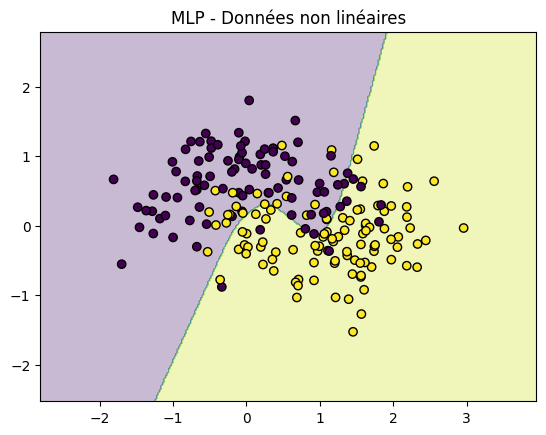

In [22]:
mlp = Sequential(
    Linear(2, 10),
    Tanh(),
    Linear(10, 2),
    LogSoftmax()
)
loss_mlp = NLLLoss()
losses_mlp = SGD(mlp, loss_mlp, X_train, y_train, eps=0.09, batch_size=16, n_epochs=100)

print(f"Accuracy MLP en train : {accuracy(mlp, X_train, y_train) * 100:.2f}%")
print(f"Accuracy MLP en test       : {accuracy(mlp, X_test, y_test) * 100:.2f}%")
plot_decision_boundary(mlp, X_test, y_test, "MLP - Données non linéaires")

In [76]:
resultats_moons = [
    {"Architecture": "2-2", "init_type": "default", "Activation": "LogSoftmax", "Learning rate": 0.1, "Batch size": 16, "Epochs": 100, "Accuracy train": "82.88%", "Accuracy test": "77.5%"},
    {"Architecture": "2-10-2", "init_type": "default", "Activation": "Tanh + LogSoftmax", "Learning rate": 0.1, "Batch size": 16, "Epochs": 100, "Accuracy train": "86.00%", "Accuracy test": "82.5%"},
    {"Architecture": "2-10-2", "init_type": "default", "Activation": "Tanh + LogSoftmax", "Learning rate": 0.01, "Batch size": 16, "Epochs": 100, "Accuracy train": "87.38%", "Accuracy test": "85.00%"},
    {"Architecture": "2-10-2", "init_type": "default", "Activation": "Tanh + LogSoftmax", "Learning rate": 0.05, "Batch size": 10, "Epochs": 100, "Accuracy train": "87.88%", "Accuracy test": "85.00%"},
    {"Architecture": "2-10-2", "init_type": "default", "Activation": "Tanh + LogSoftmax", "Learning rate": 0.09, "Batch size": 16, "Epochs": 100, "Accuracy train": "86.50%", "Accuracy test": "84.00%"},
]

df = pd.DataFrame(resultats_moons); display(df)

,Architecture,init_type,Activation,Learning rate,Batch size,Epochs,Accuracy train,Accuracy test
0,2-2,default,LogSoftmax,0.10,16,100,82.88%,77.5%
1,2-10-2,default,Tanh + LogSoftmax,0.10,16,100,86.00%,82.5%
2,2-10-2,default,Tanh + LogSoftmax,0.01,16,100,87.38%,85.00%
3,2-10-2,default,Tanh + LogSoftmax,0.05,10,100,87.88%,85.00%
4,2-10-2,default,Tanh + LogSoftmax,0.09,16,100,86.50%,84.00%


## II. Blobs  : clusters - données regroupées par grappes 

In [89]:
from sklearn.datasets import make_blobs

# Création de blobs mixés
def make_mixed_blobs(n_samples=3000, centers=6, cluster_std=1.2, random_state=42):
    X, labels = make_blobs(
        n_samples=n_samples,
        centers=centers,
        cluster_std=cluster_std,
        random_state=random_state
    )
    
    # Classification binaire des clusers 
    y = (labels >= centers // 2).astype(int).reshape(-1, 1)
    
    return X, y



X, y = make_mixed_blobs(n_samples=3000, centers=6, cluster_std=1.5) # faudrait ajuster le Std pour des données plus ou moins complexes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Epoch 1/300, Loss: 2.3447
Epoch 2/300, Loss: 1.4259
Epoch 3/300, Loss: 1.3359
Epoch 4/300, Loss: 1.3105
Epoch 5/300, Loss: 1.2524
Epoch 6/300, Loss: 1.1447
Epoch 7/300, Loss: 1.0359
Epoch 8/300, Loss: 0.9614
Epoch 9/300, Loss: 0.9098
Epoch 10/300, Loss: 0.8669
Epoch 11/300, Loss: 0.8225
Epoch 12/300, Loss: 0.7753
Epoch 13/300, Loss: 0.7169
Epoch 14/300, Loss: 0.6292
Epoch 15/300, Loss: 0.5007
Epoch 16/300, Loss: 0.3700
Epoch 17/300, Loss: 0.3112
Epoch 18/300, Loss: 0.2807
Epoch 19/300, Loss: 0.2617
Epoch 20/300, Loss: 0.2477
Epoch 21/300, Loss: 0.2375
Epoch 22/300, Loss: 0.2301
Epoch 23/300, Loss: 0.2239
Epoch 24/300, Loss: 0.2188
Epoch 25/300, Loss: 0.2145
Epoch 26/300, Loss: 0.2110
Epoch 27/300, Loss: 0.2084
Epoch 28/300, Loss: 0.2061
Epoch 29/300, Loss: 0.2035
Epoch 30/300, Loss: 0.2017
Epoch 31/300, Loss: 0.1993
Epoch 32/300, Loss: 0.1982
Epoch 33/300, Loss: 0.1967
Epoch 34/300, Loss: 0.1953
Epoch 35/300, Loss: 0.1940
Epoch 36/300, Loss: 0.1929
Epoch 37/300, Loss: 0.1914
Epoch 38/3

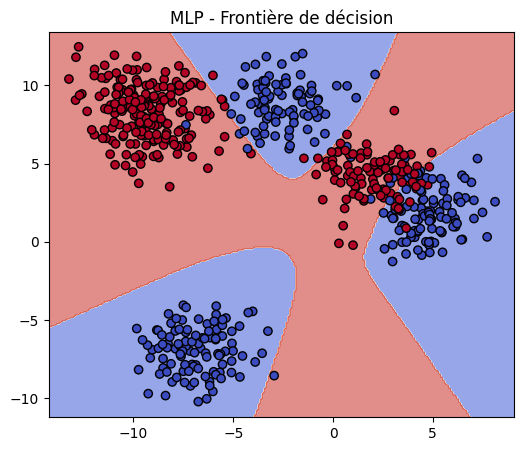

In [90]:
net = Sequential(
    Linear(2, 32, init_type=1),
    Tanh(),
    Linear(32, 1, init_type=1), # 1 sortie pour prédire une proba
    Sigmoide()
)

loss = BCELoss()
losses = SGD(net, loss, X_train, y_train, eps=0.09, batch_size=32, n_epochs=300)

y_pred = net.forward(X_test)
acc_test = np.mean((y_pred > 0.5).astype(int) == y_test)
acc_train = np.mean((net.forward(X_train) > 0.5).astype(int) == y_train)

print(f"Accuracy MLP en train : {acc_train * 100:.2f}%")
print(f"Accuracy MLP en test  : {acc_test * 100:.2f}%")

plot_decision_boundary(net, X_test, y_test, "MLP - Frontière de décision")

pas de sur apprentissage, ni de sous apprentissage, le résultat est bon , juste avec un modèle assez simple.

Epoch 1/300, Loss: 4.5026
Epoch 2/300, Loss: 4.7358
Epoch 3/300, Loss: 4.7955
Epoch 4/300, Loss: 4.8465
Epoch 5/300, Loss: 4.8679
Epoch 6/300, Loss: 4.8583
Epoch 7/300, Loss: 4.8574
Epoch 8/300, Loss: 4.8152
Epoch 9/300, Loss: 4.7957
Epoch 10/300, Loss: 4.7409
Epoch 11/300, Loss: 4.7310
Epoch 12/300, Loss: 4.6725
Epoch 13/300, Loss: 4.6101
Epoch 14/300, Loss: 4.5707
Epoch 15/300, Loss: 4.4697
Epoch 16/300, Loss: 4.4070
Epoch 17/300, Loss: 4.3272
Epoch 18/300, Loss: 4.1570
Epoch 19/300, Loss: 3.9847
Epoch 20/300, Loss: 3.6909
Epoch 21/300, Loss: 2.5449
Epoch 22/300, Loss: 1.4551
Epoch 23/300, Loss: 1.1343
Epoch 24/300, Loss: 1.0306
Epoch 25/300, Loss: 0.9598
Epoch 26/300, Loss: 0.8903
Epoch 27/300, Loss: 0.7293
Epoch 28/300, Loss: 0.4198
Epoch 29/300, Loss: 0.2938
Epoch 30/300, Loss: 0.2602
Epoch 31/300, Loss: 0.2401
Epoch 32/300, Loss: 0.2297
Epoch 33/300, Loss: 0.2211
Epoch 34/300, Loss: 0.2150
Epoch 35/300, Loss: 0.2091
Epoch 36/300, Loss: 0.2043
Epoch 37/300, Loss: 0.1978
Epoch 38/3

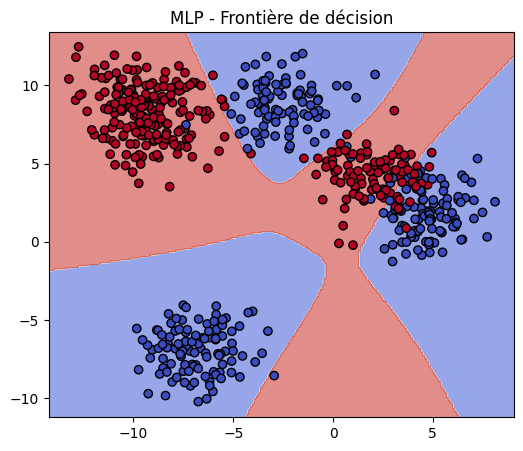

In [32]:
net = Sequential(
    Linear(2, 128, init_type=1),
    Tanh(),
    Linear(128, 1, init_type=1), # 1 sortie pour prédire une proba
    Sigmoide()
)

loss = BCELoss()
losses = SGD(net, loss, X_train, y_train, eps=0.09, batch_size=16, n_epochs=300)

y_pred = net.forward(X_test)
acc_test = np.mean((y_pred > 0.5).astype(int) == y_test)
acc_train = np.mean((net.forward(X_train) > 0.5).astype(int) == y_train)

print(f"Accuracy MLP en train : {acc_train * 100:.2f}%")
print(f"Accuracy MLP en test  : {acc_test * 100:.2f}%")

plot_decision_boundary(net, X_test, y_test, "MLP - Frontière de décision")

- Les données blobs sont bien séparables, meme si ils ne sont pas linéaires, 32 neuronnes suffit largement.
- Pas trop de bruit dans les données, alors pas besoin d'un modèle puissant.

In [33]:
# Ples de bruit, plus de données
X, y = make_mixed_blobs(n_samples=4000, centers=6, cluster_std=3) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Epoch 1/300, Loss: 3.9578
Epoch 2/300, Loss: 2.7081
Epoch 3/300, Loss: 1.6127
Epoch 4/300, Loss: 1.2896
Epoch 5/300, Loss: 0.9932
Epoch 6/300, Loss: 0.6552
Epoch 7/300, Loss: 0.5027
Epoch 8/300, Loss: 0.4608
Epoch 9/300, Loss: 0.4502
Epoch 10/300, Loss: 0.4437
Epoch 11/300, Loss: 0.4397
Epoch 12/300, Loss: 0.4373
Epoch 13/300, Loss: 0.4329
Epoch 14/300, Loss: 0.4312
Epoch 15/300, Loss: 0.4313
Epoch 16/300, Loss: 0.4283
Epoch 17/300, Loss: 0.4279
Epoch 18/300, Loss: 0.4254
Epoch 19/300, Loss: 0.4252
Epoch 20/300, Loss: 0.4228
Epoch 21/300, Loss: 0.4232
Epoch 22/300, Loss: 0.4214
Epoch 23/300, Loss: 0.4183
Epoch 24/300, Loss: 0.4187
Epoch 25/300, Loss: 0.4177
Epoch 26/300, Loss: 0.4172
Epoch 27/300, Loss: 0.4175
Epoch 28/300, Loss: 0.4156
Epoch 29/300, Loss: 0.4167
Epoch 30/300, Loss: 0.4133
Epoch 31/300, Loss: 0.4131
Epoch 32/300, Loss: 0.4156
Epoch 33/300, Loss: 0.4128
Epoch 34/300, Loss: 0.4105
Epoch 35/300, Loss: 0.4128
Epoch 36/300, Loss: 0.4110
Epoch 37/300, Loss: 0.4109
Epoch 38/3

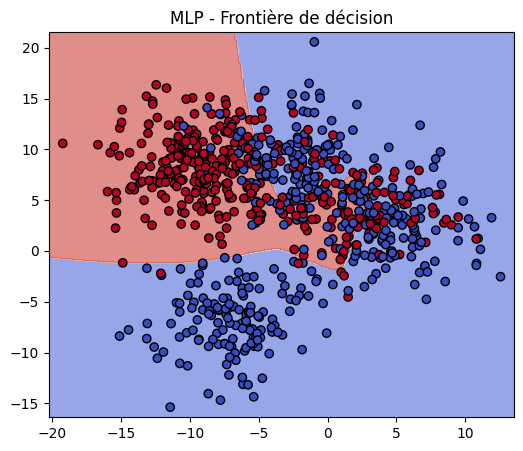

In [34]:
net = Sequential(
    Linear(2, 128, init_type=1),
    Tanh(),
    Linear(128, 1, init_type=1), # 1 sortie pour prédire une proba
    Sigmoide()
)

loss = BCELoss()
losses = SGD(net, loss, X_train, y_train, eps=0.09, batch_size=16, n_epochs=300)

y_pred = net.forward(X_test)
acc_test = np.mean((y_pred > 0.5).astype(int) == y_test)
acc_train = np.mean((net.forward(X_train) > 0.5).astype(int) == y_train)

print(f"Accuracy MLP en train : {acc_train * 100:.2f}%")
print(f"Accuracy MLP en test  : {acc_test * 100:.2f}%")

plot_decision_boundary(net, X_test, y_test, "MLP - Frontière de décision")

Epoch 1/300, Loss: 1.9200
Epoch 2/300, Loss: 1.8175
Epoch 3/300, Loss: 1.9133
Epoch 4/300, Loss: 2.0238
Epoch 5/300, Loss: 2.0724
Epoch 6/300, Loss: 2.0995
Epoch 7/300, Loss: 2.1159
Epoch 8/300, Loss: 2.1266
Epoch 9/300, Loss: 2.1302
Epoch 10/300, Loss: 2.1304
Epoch 11/300, Loss: 2.1324
Epoch 12/300, Loss: 2.1232
Epoch 13/300, Loss: 2.1143
Epoch 14/300, Loss: 2.0970
Epoch 15/300, Loss: 2.0760
Epoch 16/300, Loss: 2.0385
Epoch 17/300, Loss: 1.9923
Epoch 18/300, Loss: 1.9520
Epoch 19/300, Loss: 1.9126
Epoch 20/300, Loss: 1.8817
Epoch 21/300, Loss: 1.8613
Epoch 22/300, Loss: 1.8324
Epoch 23/300, Loss: 1.8050
Epoch 24/300, Loss: 1.7743
Epoch 25/300, Loss: 1.7399
Epoch 26/300, Loss: 1.6993
Epoch 27/300, Loss: 1.6649
Epoch 28/300, Loss: 1.6146
Epoch 29/300, Loss: 1.5717
Epoch 30/300, Loss: 1.5223
Epoch 31/300, Loss: 1.4633
Epoch 32/300, Loss: 1.4045
Epoch 33/300, Loss: 1.3375
Epoch 34/300, Loss: 1.2671
Epoch 35/300, Loss: 1.1646
Epoch 36/300, Loss: 1.0392
Epoch 37/300, Loss: 0.8508
Epoch 38/3

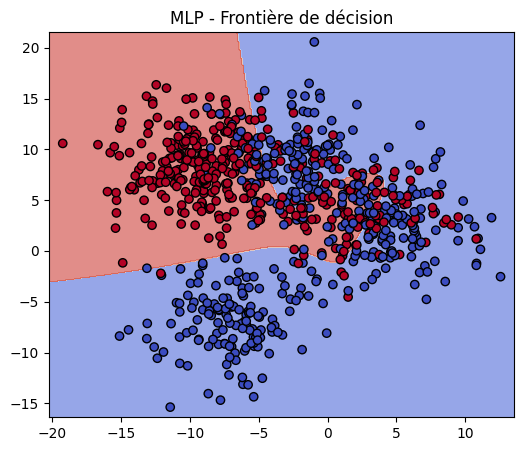

In [35]:
# Ajout de 2 couches
net = Sequential(
    Linear(2, 64, init_type=1),
    Tanh(),
    Linear(64, 128, init_type=1),
    Tanh(),
    Linear(128, 64, init_type=1),
    Tanh(),
    Linear(64, 1, init_type=1), # 1 sortie pour prédire une proba
    Sigmoide()
)

loss = BCELoss()
losses = SGD(net, loss, X_train, y_train, eps=0.01, batch_size=16, n_epochs=300)

y_pred = net.forward(X_test)
acc_test = np.mean((y_pred > 0.5).astype(int) == y_test)
acc_train = np.mean((net.forward(X_train) > 0.5).astype(int) == y_train)

print(f"Accuracy MLP en train : {acc_train * 100:.2f}%")
print(f"Accuracy MLP en test  : {acc_test * 100:.2f}%")

plot_decision_boundary(net, X_test, y_test, "MLP - Frontière de décision")

Epoch 1/300, Loss: 1.6251
Epoch 2/300, Loss: 1.3244
Epoch 3/300, Loss: 0.9676
Epoch 4/300, Loss: 0.4809
Epoch 5/300, Loss: 0.4483
Epoch 6/300, Loss: 0.4355
Epoch 7/300, Loss: 0.4303
Epoch 8/300, Loss: 0.4248
Epoch 9/300, Loss: 0.4239
Epoch 10/300, Loss: 0.4184
Epoch 11/300, Loss: 0.4173
Epoch 12/300, Loss: 0.4160
Epoch 13/300, Loss: 0.4114
Epoch 14/300, Loss: 0.4105
Epoch 15/300, Loss: 0.4116
Epoch 16/300, Loss: 0.4094
Epoch 17/300, Loss: 0.4100
Epoch 18/300, Loss: 0.4080
Epoch 19/300, Loss: 0.4078
Epoch 20/300, Loss: 0.4068
Epoch 21/300, Loss: 0.4081
Epoch 22/300, Loss: 0.4058
Epoch 23/300, Loss: 0.4034
Epoch 24/300, Loss: 0.4039
Epoch 25/300, Loss: 0.4028
Epoch 26/300, Loss: 0.4033
Epoch 27/300, Loss: 0.4033
Epoch 28/300, Loss: 0.4025
Epoch 29/300, Loss: 0.4040
Epoch 30/300, Loss: 0.4002
Epoch 31/300, Loss: 0.4012
Epoch 32/300, Loss: 0.4035
Epoch 33/300, Loss: 0.4012
Epoch 34/300, Loss: 0.3976
Epoch 35/300, Loss: 0.4013
Epoch 36/300, Loss: 0.3998
Epoch 37/300, Loss: 0.3990
Epoch 38/3

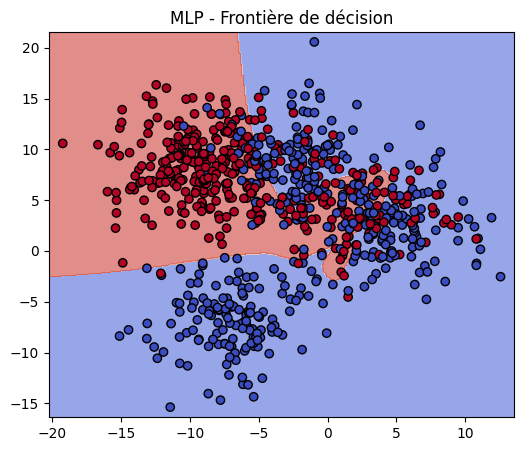

In [36]:
net = Sequential(
    Linear(2, 64, init_type=1),
    Tanh(),
    Linear(64, 128, init_type=1),
    Tanh(),
    Linear(128, 64, init_type=1),
    Tanh(),
    Linear(64, 1, init_type=1), # 1 sortie pour prédire une proba
    Sigmoide()
)

loss = BCELoss()
losses = SGD(net, loss, X_train, y_train, eps=0.1, batch_size=16, n_epochs=300) # pas 0.1

y_pred = net.forward(X_test)
acc_test = np.mean((y_pred > 0.5).astype(int) == y_test)
acc_train = np.mean((net.forward(X_train) > 0.5).astype(int) == y_train)

print(f"Accuracy MLP en train : {acc_train * 100:.2f}%")
print(f"Accuracy MLP en test  : {acc_test * 100:.2f}%")

plot_decision_boundary(net, X_test, y_test, "MLP - Frontière de décision")

Epoch 1/300, Loss: 1.6534
Epoch 2/300, Loss: 1.3769
Epoch 3/300, Loss: 1.2061
Epoch 4/300, Loss: 0.8555
Epoch 5/300, Loss: 0.4857
Epoch 6/300, Loss: 0.4493
Epoch 7/300, Loss: 0.4404
Epoch 8/300, Loss: 0.4339
Epoch 9/300, Loss: 0.4308
Epoch 10/300, Loss: 0.4249
Epoch 11/300, Loss: 0.4209
Epoch 12/300, Loss: 0.4175
Epoch 13/300, Loss: 0.4151
Epoch 14/300, Loss: 0.4130
Epoch 15/300, Loss: 0.4140
Epoch 16/300, Loss: 0.4108
Epoch 17/300, Loss: 0.4130
Epoch 18/300, Loss: 0.4091
Epoch 19/300, Loss: 0.4075
Epoch 20/300, Loss: 0.4081
Epoch 21/300, Loss: 0.4097
Epoch 22/300, Loss: 0.4071
Epoch 23/300, Loss: 0.4061
Epoch 24/300, Loss: 0.4058
Epoch 25/300, Loss: 0.4043
Epoch 26/300, Loss: 0.4048
Epoch 27/300, Loss: 0.4059
Epoch 28/300, Loss: 0.4026
Epoch 29/300, Loss: 0.4054
Epoch 30/300, Loss: 0.4022
Epoch 31/300, Loss: 0.4024
Epoch 32/300, Loss: 0.4048
Epoch 33/300, Loss: 0.4028
Epoch 34/300, Loss: 0.3990
Epoch 35/300, Loss: 0.4029
Epoch 36/300, Loss: 0.4005
Epoch 37/300, Loss: 0.4020
Epoch 38/3

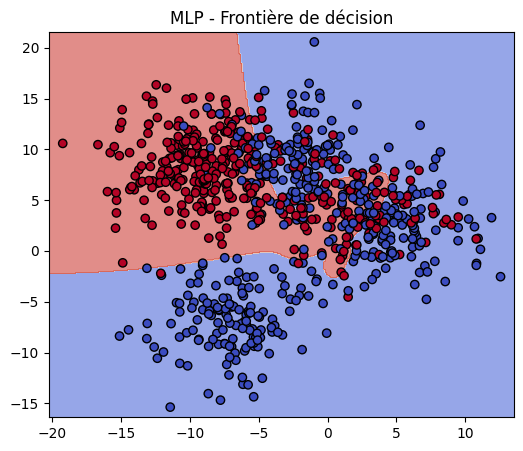

In [37]:
net = Sequential(
    Linear(2, 64, init_type=1),
    Tanh(),
    Linear(64, 128, init_type=1),
    Tanh(),
    Linear(128, 64, init_type=1),
    Tanh(),
    Linear(64, 1, init_type=1), # 1 sortie pour prédire une proba
    Sigmoide()
)


loss = BCELoss()
losses = SGD(net, loss, X_train, y_train, eps=0.15, batch_size=32, n_epochs=300)

y_pred = net.forward(X_test)
acc_test = np.mean((y_pred > 0.5).astype(int) == y_test)
acc_train = np.mean((net.forward(X_train) > 0.5).astype(int) == y_train)

print(f"Accuracy MLP en train : {acc_train * 100:.2f}%")
print(f"Accuracy MLP en test  : {acc_test * 100:.2f}%")

plot_decision_boundary(net, X_test, y_test, "MLP - Frontière de décision")

In [74]:
resultat_blobs = [
    {"Architecture": "2-32-1", "init_type": "1", "Activation": "Tanh + Sigmoide", "Learning rate": 0.09, "Batch size": 32, "Epochs": 300, "Accuracy train": "94.71%", "Accuracy test": "93.50%"},
    {"Architecture": "2-128-1", "init_type": "1", "Activation": "Tanh + Sigmoide", "Learning rate": 0.09, "Batch size": 16, "Epochs": 300, "Accuracy train": "94.54%", "Accuracy test": "93.67%"}, 
    {"Architecture": "2-128-1 + bruit et + exemples", "init_type": "1", "Activation": "Tanh + Sigmoide", "Learning rate": 0.09, "Batch size": 16, "Epochs": 300, "Accuracy train": "79.72%", "Accuracy test": "80.00%"},
    {"Architecture": "2-64-128-64-1 + bruit et + exemples", "init_type": "1", "Activation": "Tanh + Sigmoide", "Learning rate": 0.01, "Batch size": 16, "Epochs": 300, "Accuracy train": "79.75%", "Accuracy test": "79.88%"},
    {"Architecture": "2-64-128-64-1 + bruit et + exemples", "init_type": "1", "Activation": "Tanh + Sigmoide", "Learning rate": 0.1, "Batch size": 16, "Epochs": 300, "Accuracy train": "80.00%", "Accuracy test": "80.38%"},
]
df = pd.DataFrame(resultat_blobs); display(df)

,Architecture,init_type,Activation,Learning rate,Batch size,Epochs,Accuracy train,Accuracy test
0,2-32-1,1,Tanh + Sigmoide,0.09,32,300,94.71%,93.50%
1,2-128-1,1,Tanh + Sigmoide,0.09,16,300,94.54%,93.67%
2,2-128-1 + bruit et + exemples,1,Tanh + Sigmoide,0.09,16,300,79.72%,80.00%
3,2-64-128-64-1 + bruit et + exemples,1,Tanh + Sigmoide,0.01,16,300,79.75%,79.88%
4,2-64-128-64-1 + bruit et + exemples,1,Tanh + Sigmoide,0.10,16,300,80.00%,80.38%


### III. Echiquier 

Le motif d'échiquier est une fonction non-linéaire. Le paramètre "k" détermine combien de cases sont générées.

In [67]:
def generate_checkerboard(n_samples=3000, k=10, seed=None):
    if seed is not None:
        np.random.seed(seed)
    X = np.random.rand(n_samples, 2)
    y = (((X[:, 0] * k).astype(int) + (X[:, 1] * k).astype(int)) % 2).astype(int)
    return X, y.reshape(-1, 1)

# échiquier 10x10
X, y = generate_checkerboard(n_samples=3000, k=10, seed=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
def plot_decision_boundary(model, X, y, title):
    h = 0.01
    padding = 0.1  

    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.forward(grid)
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.coolwarm, edgecolors='k', s=20)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Epoch 1/90, Loss: 1.4632
Epoch 2/90, Loss: 1.4514
Epoch 3/90, Loss: 1.4394
Epoch 4/90, Loss: 1.4272
Epoch 5/90, Loss: 1.4148
Epoch 6/90, Loss: 1.4022
Epoch 7/90, Loss: 1.3895
Epoch 8/90, Loss: 1.3766
Epoch 9/90, Loss: 1.3634
Epoch 10/90, Loss: 1.3500
Epoch 11/90, Loss: 1.3365
Epoch 12/90, Loss: 1.3228
Epoch 13/90, Loss: 1.3088
Epoch 14/90, Loss: 1.2947
Epoch 15/90, Loss: 1.2803
Epoch 16/90, Loss: 1.2658
Epoch 17/90, Loss: 1.2510
Epoch 18/90, Loss: 1.2361
Epoch 19/90, Loss: 1.2210
Epoch 20/90, Loss: 1.2057
Epoch 21/90, Loss: 1.1901
Epoch 22/90, Loss: 1.1746
Epoch 23/90, Loss: 1.1587
Epoch 24/90, Loss: 1.1429
Epoch 25/90, Loss: 1.1269
Epoch 26/90, Loss: 1.1107
Epoch 27/90, Loss: 1.0945
Epoch 28/90, Loss: 1.0782
Epoch 29/90, Loss: 1.0619
Epoch 30/90, Loss: 1.0457
Epoch 31/90, Loss: 1.0294
Epoch 32/90, Loss: 1.0132
Epoch 33/90, Loss: 0.9973
Epoch 34/90, Loss: 0.9812
Epoch 35/90, Loss: 0.9655
Epoch 36/90, Loss: 0.9500
Epoch 37/90, Loss: 0.9348
Epoch 38/90, Loss: 0.9199
Epoch 39/90, Loss: 0.

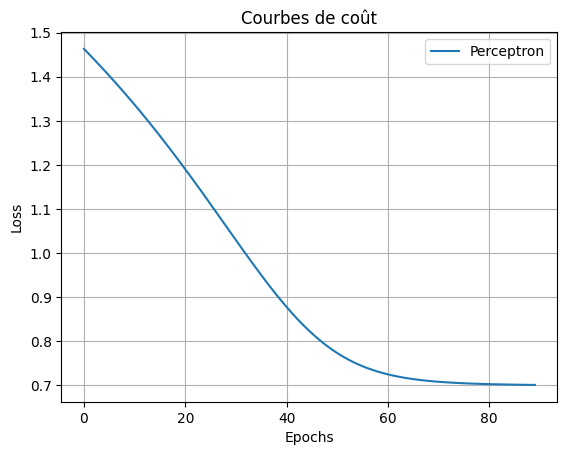

Accuracy Perceptron : 50.00%


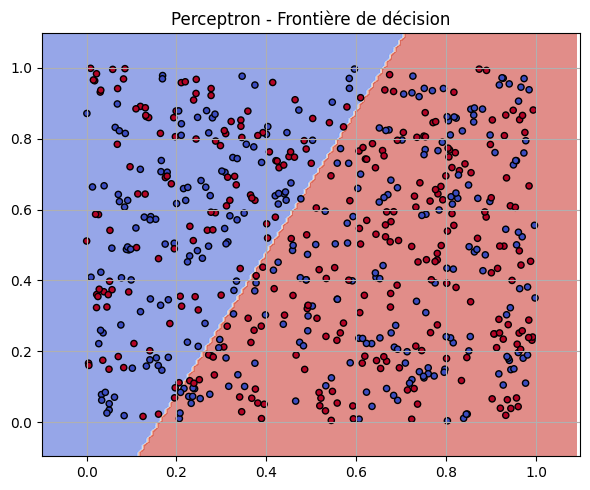

In [53]:
net1 = Sequential(
    Linear(2, 1),
    Sigmoide()
)

loss1 = BCELoss()
losses1 = SGD(net1, loss1, X_train, y_train, eps=0.01, batch_size=32, n_epochs=90)

plt.plot(losses1, label="Perceptron")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Courbes de coût")
plt.legend()
plt.grid(True)
plt.show()

y_pred1 = net1.forward(X_test)
acc1 = np.mean((y_pred1 > 0.5).astype(int) == y_test)
print(f"Accuracy Perceptron : {acc1 * 100:.2f}%")
plot_decision_boundary(net1, X_test, y_test, "Perceptron - Frontière de décision")

Le perceptron n'arrive pas à modéliser une frontière aussi complèxe que celle de l'échiquier 10x10

Epoch 1/2000, Loss: 10.3789
Epoch 2/2000, Loss: 10.3789
Epoch 3/2000, Loss: 10.3789
Epoch 4/2000, Loss: 10.3789
Epoch 5/2000, Loss: 10.3789
Epoch 6/2000, Loss: 10.3789
Epoch 7/2000, Loss: 10.3789
Epoch 8/2000, Loss: 10.3789
Epoch 9/2000, Loss: 10.3789
Epoch 10/2000, Loss: 10.3789
Epoch 11/2000, Loss: 10.3789
Epoch 12/2000, Loss: 10.3789
Epoch 13/2000, Loss: 10.3789
Epoch 14/2000, Loss: 10.3789
Epoch 15/2000, Loss: 10.3789
Epoch 16/2000, Loss: 10.3789
Epoch 17/2000, Loss: 10.3789
Epoch 18/2000, Loss: 10.3789
Epoch 19/2000, Loss: 10.3789
Epoch 20/2000, Loss: 10.3789
Epoch 21/2000, Loss: 10.3789
Epoch 22/2000, Loss: 10.3789
Epoch 23/2000, Loss: 10.3789
Epoch 24/2000, Loss: 10.3789
Epoch 25/2000, Loss: 10.3789
Epoch 26/2000, Loss: 10.3789
Epoch 27/2000, Loss: 10.3789
Epoch 28/2000, Loss: 10.3789
Epoch 29/2000, Loss: 10.3789
Epoch 30/2000, Loss: 10.3789
Epoch 31/2000, Loss: 10.3789
Epoch 32/2000, Loss: 10.3789
Epoch 33/2000, Loss: 10.3789
Epoch 34/2000, Loss: 10.3789
Epoch 35/2000, Loss: 10

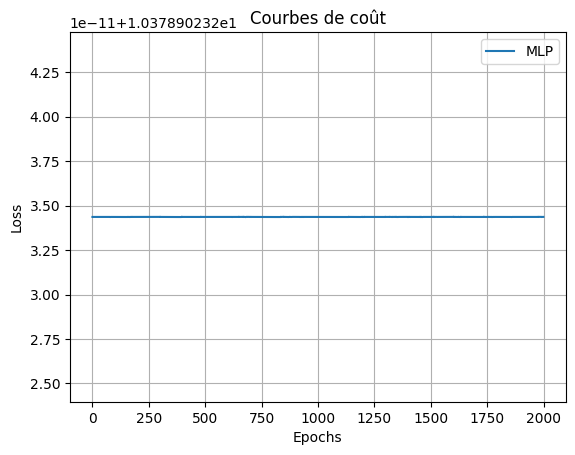

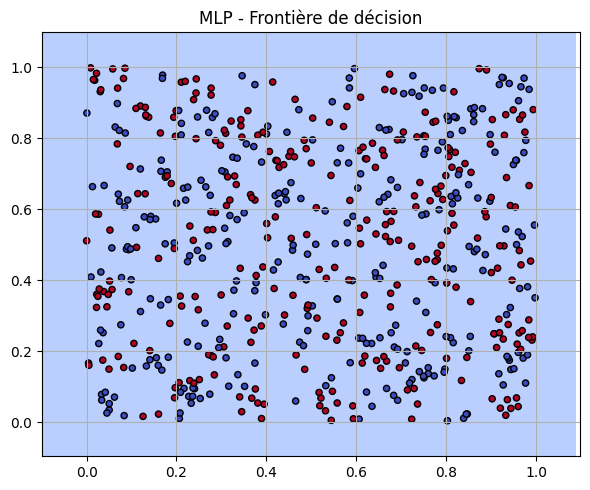

In [54]:
net2 = Sequential(
    Linear(2, 64),
    Tanh(),
    Linear(64, 1),
    Sigmoide()
)
loss2 = BCELoss()
losses2 = SGD(net2, loss2, X_train, y_train, eps=0.09, batch_size=32, n_epochs=2000)
y_predtr = net2.forward(X_train);acctr = np.mean((y_predtr > 0.5).astype(int) == y_train);print(f"Accuracy MLP en train : {acctr * 100:.2f}%")

y_pred2 = net2.forward(X_test)
acc2 = np.mean((y_pred2 > 0.5).astype(int) == y_test)
print(f"Accuracy MLP en test : {acc2 * 100:.2f}%")

plt.plot(losses2, label="MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Courbes de coût")
plt.legend()
plt.grid(True)
plt.show()

plot_decision_boundary(net2, X_test, y_test, "MLP - Frontière de décision")


Le modèle n'apprend rien, le cout ne descends pas du tout. Je ne peux expliquer pourquoi!

Epoch 1/2000, Loss: 5.2685
Epoch 2/2000, Loss: 5.2620
Epoch 3/2000, Loss: 5.2556
Epoch 4/2000, Loss: 5.2489
Epoch 5/2000, Loss: 5.2422
Epoch 6/2000, Loss: 5.2354
Epoch 7/2000, Loss: 5.2286
Epoch 8/2000, Loss: 5.2215
Epoch 9/2000, Loss: 5.2144
Epoch 10/2000, Loss: 5.2073
Epoch 11/2000, Loss: 5.2000
Epoch 12/2000, Loss: 5.1926
Epoch 13/2000, Loss: 5.1850
Epoch 14/2000, Loss: 5.1773
Epoch 15/2000, Loss: 5.1697
Epoch 16/2000, Loss: 5.1619
Epoch 17/2000, Loss: 5.1538
Epoch 18/2000, Loss: 5.1456
Epoch 19/2000, Loss: 5.1374
Epoch 20/2000, Loss: 5.1290
Epoch 21/2000, Loss: 5.1205
Epoch 22/2000, Loss: 5.1116
Epoch 23/2000, Loss: 5.1029
Epoch 24/2000, Loss: 5.0935
Epoch 25/2000, Loss: 5.0843
Epoch 26/2000, Loss: 5.0750
Epoch 27/2000, Loss: 5.0655
Epoch 28/2000, Loss: 5.0555
Epoch 29/2000, Loss: 5.0456
Epoch 30/2000, Loss: 5.0353
Epoch 31/2000, Loss: 5.0249
Epoch 32/2000, Loss: 5.0143
Epoch 33/2000, Loss: 5.0031
Epoch 34/2000, Loss: 4.9920
Epoch 35/2000, Loss: 4.9805
Epoch 36/2000, Loss: 4.9687
E

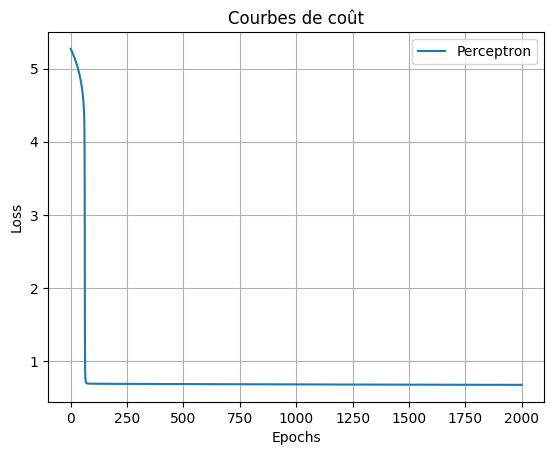

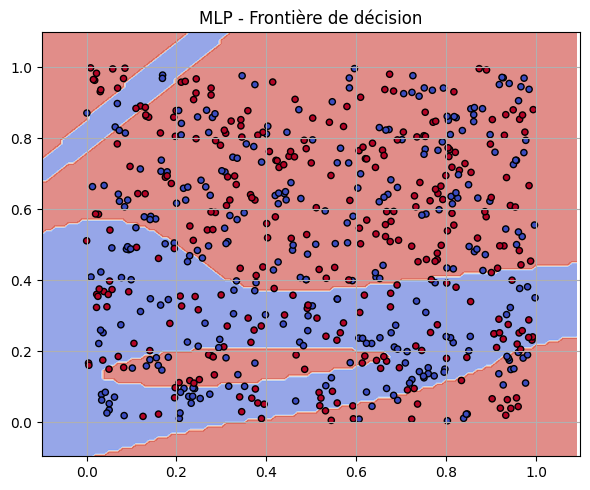

In [ ]:
# n'a pas marché avec une initialisation de type 1 (et un pas de 0.09)

net2 = Sequential(
    Linear(2, 64, init_type='random'),
    Tanh(),
    Linear(64, 32, init_type='random'),
    Tanh(),
    Linear(32, 1, init_type='random'),
    Sigmoide()
)

loss2 = BCELoss()
losses2 = SGD(net2, loss2, X_train, y_train, eps=0.01, batch_size=10, n_epochs=2000)
y_predtr = net2.forward(X_train);acctr = np.mean((y_predtr > 0.5).astype(int) == y_train);print(f"Accuracy MLP en train : {acctr * 100:.2f}%")

y_pred2 = net2.forward(X_test)
acc2 = np.mean((y_pred2 > 0.5).astype(int) == y_test)
print(f"Accuracy MLP en test : {acc2 * 100:.2f}%")

print(net2.forward(X_train[:5]))

plt.plot(losses2, label="MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Courbes de coût")
plt.legend()
plt.grid(True)
plt.show()

plot_decision_boundary(net2, X_test, y_test, "MLP - Frontière de décision")


On utilise Tanh(), une mauvaise initialisation paut faire que les sorties sont dans les zones de saturation (tanh = +/- 1), ce qui est la cause des dérivées nulles.
yhat  seront toujours de 0.5 

Epoch 1/1000, Loss: 10.3771
Epoch 2/1000, Loss: 10.3771
Epoch 3/1000, Loss: 10.3771
Epoch 4/1000, Loss: 10.3771
Epoch 5/1000, Loss: 10.3771
Epoch 6/1000, Loss: 10.3771
Epoch 7/1000, Loss: 10.3771
Epoch 8/1000, Loss: 10.3771
Epoch 9/1000, Loss: 10.3771
Epoch 10/1000, Loss: 10.3771
Epoch 11/1000, Loss: 10.3771
Epoch 12/1000, Loss: 10.3771
Epoch 13/1000, Loss: 10.3771
Epoch 14/1000, Loss: 10.3771
Epoch 15/1000, Loss: 10.3771
Epoch 16/1000, Loss: 10.3771
Epoch 17/1000, Loss: 10.3771
Epoch 18/1000, Loss: 10.3771
Epoch 19/1000, Loss: 10.3771
Epoch 20/1000, Loss: 10.3771
Epoch 21/1000, Loss: 10.3771
Epoch 22/1000, Loss: 10.3771
Epoch 23/1000, Loss: 10.3771
Epoch 24/1000, Loss: 10.3771
Epoch 25/1000, Loss: 10.3771
Epoch 26/1000, Loss: 10.3771
Epoch 27/1000, Loss: 10.3771
Epoch 28/1000, Loss: 10.3771
Epoch 29/1000, Loss: 10.3771
Epoch 30/1000, Loss: 10.3771
Epoch 31/1000, Loss: 10.3771
Epoch 32/1000, Loss: 10.3771
Epoch 33/1000, Loss: 10.3771
Epoch 34/1000, Loss: 10.3771
Epoch 35/1000, Loss: 10

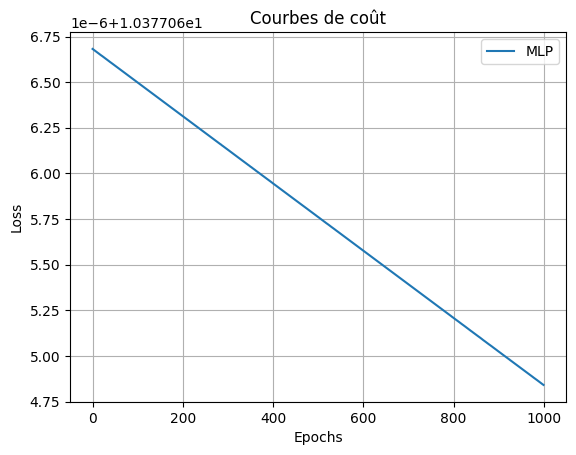

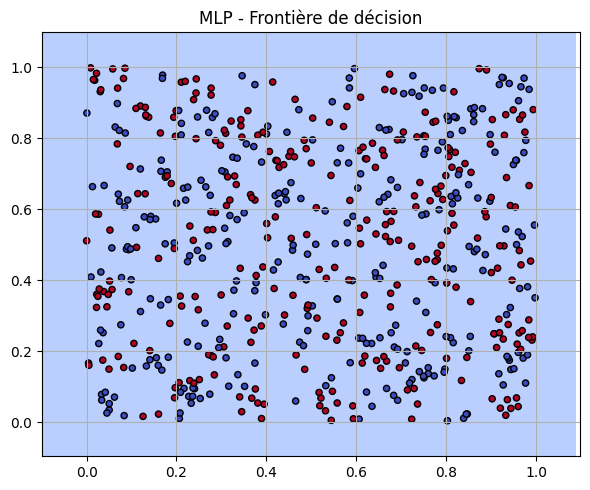

In [69]:
net2 = Sequential(
    Linear(2, 128, init_type='random'),
    Tanh(),
    Linear(128, 64, init_type='random'),
    Tanh(),
    Linear(64, 1, init_type='random'),
    Sigmoide()
)

loss2 = BCELoss()
losses2 = SGD(net2, loss2, X_train, y_train, eps=0.01, batch_size=10, n_epochs=1000)
y_predtr = net2.forward(X_train);acctr = np.mean((y_predtr > 0.5).astype(int) == y_train);print(f"Accuracy MLP en train : {acctr * 100:.2f}%")

y_pred2 = net2.forward(X_test)
acc2 = np.mean((y_pred2 > 0.5).astype(int) == y_test)
print(f"Accuracy MLP en test : {acc2 * 100:.2f}%")


plt.plot(losses2, label="MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Courbes de coût")
plt.legend()
plt.grid(True)
plt.show()

plot_decision_boundary(net2, X_test, y_test, "MLP - Frontière de décision")


L'initialisation, fait que la sigmoide soit saturée d'ou le résultat.

Epoch 1/1000, Loss: 2.2327
Epoch 2/1000, Loss: 2.0845
Epoch 3/1000, Loss: 1.8820
Epoch 4/1000, Loss: 1.5666
Epoch 5/1000, Loss: 1.0205
Epoch 6/1000, Loss: 0.7290
Epoch 7/1000, Loss: 0.7206
Epoch 8/1000, Loss: 0.7182
Epoch 9/1000, Loss: 0.7165
Epoch 10/1000, Loss: 0.7147
Epoch 11/1000, Loss: 0.7129
Epoch 12/1000, Loss: 0.7115
Epoch 13/1000, Loss: 0.7099
Epoch 14/1000, Loss: 0.7089
Epoch 15/1000, Loss: 0.7073
Epoch 16/1000, Loss: 0.7062
Epoch 17/1000, Loss: 0.7055
Epoch 18/1000, Loss: 0.7045
Epoch 19/1000, Loss: 0.7034
Epoch 20/1000, Loss: 0.7023
Epoch 21/1000, Loss: 0.7022
Epoch 22/1000, Loss: 0.7014
Epoch 23/1000, Loss: 0.7007
Epoch 24/1000, Loss: 0.7000
Epoch 25/1000, Loss: 0.6995
Epoch 26/1000, Loss: 0.6990
Epoch 27/1000, Loss: 0.6982
Epoch 28/1000, Loss: 0.6979
Epoch 29/1000, Loss: 0.6972
Epoch 30/1000, Loss: 0.6973
Epoch 31/1000, Loss: 0.6968
Epoch 32/1000, Loss: 0.6964
Epoch 33/1000, Loss: 0.6960
Epoch 34/1000, Loss: 0.6955
Epoch 35/1000, Loss: 0.6956
Epoch 36/1000, Loss: 0.6953
E

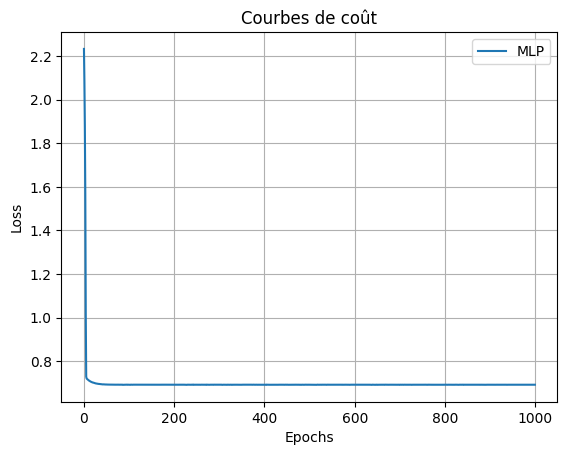

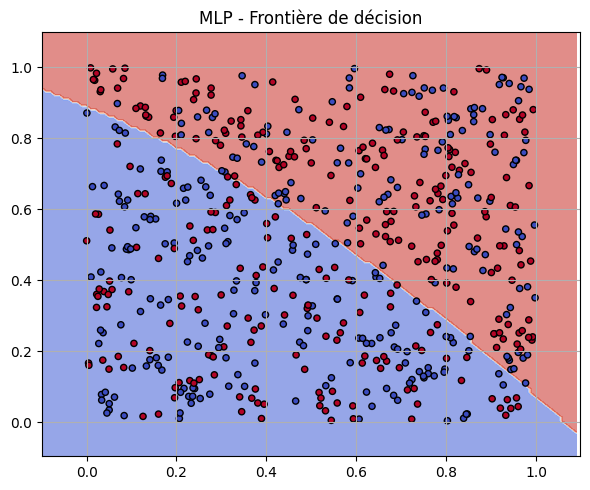

In [58]:
net2 = Sequential(
    Linear(2, 128, init_type=1),
    Tanh(),
    Linear(128, 64, init_type=1),
    Tanh(),
    Linear(64, 1, init_type=1),
    Sigmoide()
)

loss2 = BCELoss()
losses2 = SGD(net2, loss2, X_train, y_train, eps=0.01, batch_size=10, n_epochs=1000)
y_predtr = net2.forward(X_train);acctr = np.mean((y_predtr > 0.5).astype(int) == y_train);print(f"Accuracy MLP en train : {acctr * 100:.2f}%")

y_pred2 = net2.forward(X_test)
acc2 = np.mean((y_pred2 > 0.5).astype(int) == y_test)
print(f"Accuracy MLP en test : {acc2 * 100:.2f}%")


plt.plot(losses2, label="MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Courbes de coût")
plt.legend()
plt.grid(True)
plt.show()

plot_decision_boundary(net2, X_test, y_test, "MLP - Frontière de décision")


Epoch 1/2000, Loss: 2.0477
Epoch 2/2000, Loss: 0.7101
Epoch 3/2000, Loss: 0.7053
Epoch 4/2000, Loss: 0.7026
Epoch 5/2000, Loss: 0.6986
Epoch 6/2000, Loss: 0.6898
Epoch 7/2000, Loss: 0.6927
Epoch 8/2000, Loss: 0.6920
Epoch 9/2000, Loss: 0.6941
Epoch 10/2000, Loss: 0.7025
Epoch 11/2000, Loss: 0.6919
Epoch 12/2000, Loss: 0.6934
Epoch 13/2000, Loss: 0.6895
Epoch 14/2000, Loss: 0.6933
Epoch 15/2000, Loss: 0.6981
Epoch 16/2000, Loss: 0.6882
Epoch 17/2000, Loss: 0.6879
Epoch 18/2000, Loss: 0.6902
Epoch 19/2000, Loss: 0.6887
Epoch 20/2000, Loss: 0.6865
Epoch 21/2000, Loss: 0.6881
Epoch 22/2000, Loss: 0.6934
Epoch 23/2000, Loss: 0.6898
Epoch 24/2000, Loss: 0.6902
Epoch 25/2000, Loss: 0.6902
Epoch 26/2000, Loss: 0.6887
Epoch 27/2000, Loss: 0.6847
Epoch 28/2000, Loss: 0.6883
Epoch 29/2000, Loss: 0.6873
Epoch 30/2000, Loss: 0.6893
Epoch 31/2000, Loss: 0.6902
Epoch 32/2000, Loss: 0.6906
Epoch 33/2000, Loss: 0.6857
Epoch 34/2000, Loss: 0.6866
Epoch 35/2000, Loss: 0.6860
Epoch 36/2000, Loss: 0.6880
E

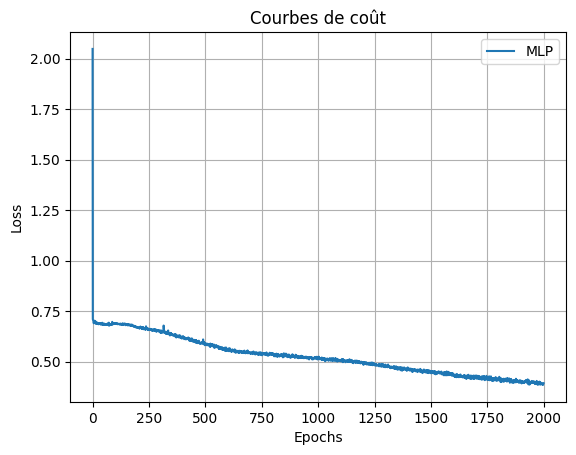

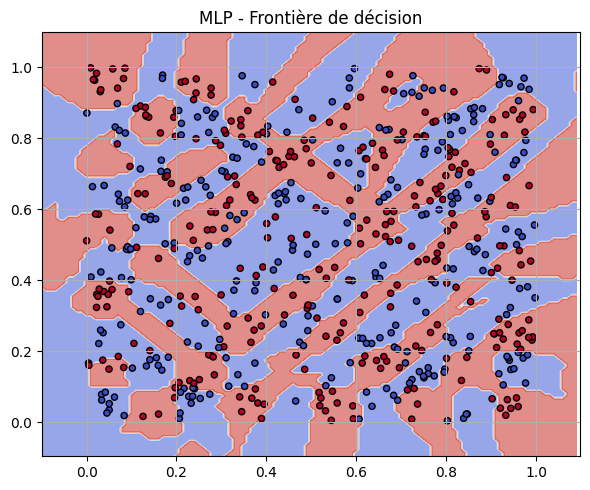

In [59]:
net2 = Sequential(
    Linear(2, 50),
    Tanh(),
    Linear(50, 100),
    Tanh(),
    Linear(100, 50),
    Tanh(),
    Linear(50, 1),
    Sigmoide()
)
loss2 = BCELoss()
losses2 = SGD(net2, loss2, X_train, y_train, eps=0.09, batch_size=10, n_epochs=2000)
y_predtr = net2.forward(X_train);acctr = np.mean((y_predtr > 0.5).astype(int) == y_train);print(f"Accuracy MLP en train : {acctr * 100:.2f}%")

y_pred2 = net2.forward(X_test)
acc2 = np.mean((y_pred2 > 0.5).astype(int) == y_test)
print(f"Accuracy MLP en test : {acc2 * 100:.2f}%")

plt.plot(losses2, label="MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Courbes de coût")
plt.legend()
plt.grid(True)
plt.show()

plot_decision_boundary(net2, X_test, y_test, "MLP - Frontière de décision")

Epoch 1/2000, Loss: 8.5008
Epoch 2/2000, Loss: 8.4989
Epoch 3/2000, Loss: 8.4969
Epoch 4/2000, Loss: 8.4950
Epoch 5/2000, Loss: 8.4925
Epoch 6/2000, Loss: 8.4903
Epoch 7/2000, Loss: 8.4881
Epoch 8/2000, Loss: 8.4855
Epoch 9/2000, Loss: 8.4828
Epoch 10/2000, Loss: 8.4802
Epoch 11/2000, Loss: 8.4773
Epoch 12/2000, Loss: 8.4742
Epoch 13/2000, Loss: 8.4710
Epoch 14/2000, Loss: 8.4675
Epoch 15/2000, Loss: 8.4636
Epoch 16/2000, Loss: 8.4593
Epoch 17/2000, Loss: 8.4549
Epoch 18/2000, Loss: 8.4504
Epoch 19/2000, Loss: 8.4450
Epoch 20/2000, Loss: 8.4386
Epoch 21/2000, Loss: 8.4322
Epoch 22/2000, Loss: 8.4240
Epoch 23/2000, Loss: 8.4155
Epoch 24/2000, Loss: 8.4042
Epoch 25/2000, Loss: 8.3923
Epoch 26/2000, Loss: 8.3748
Epoch 27/2000, Loss: 8.3513
Epoch 28/2000, Loss: 8.3187
Epoch 29/2000, Loss: 8.2610
Epoch 30/2000, Loss: 8.0635
Epoch 31/2000, Loss: 7.2999
Epoch 32/2000, Loss: 5.8438
Epoch 33/2000, Loss: 4.9406
Epoch 34/2000, Loss: 4.2282
Epoch 35/2000, Loss: 3.6369
Epoch 36/2000, Loss: 2.8033
E

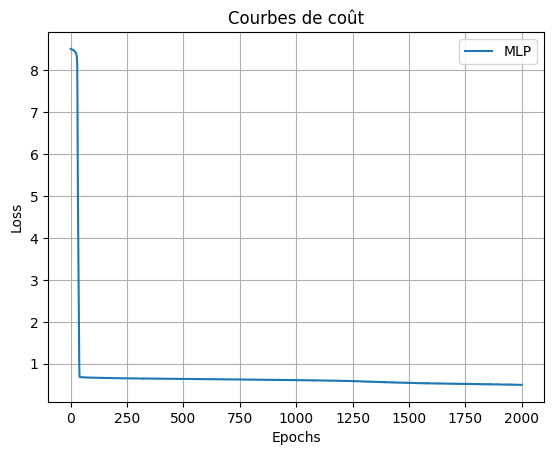

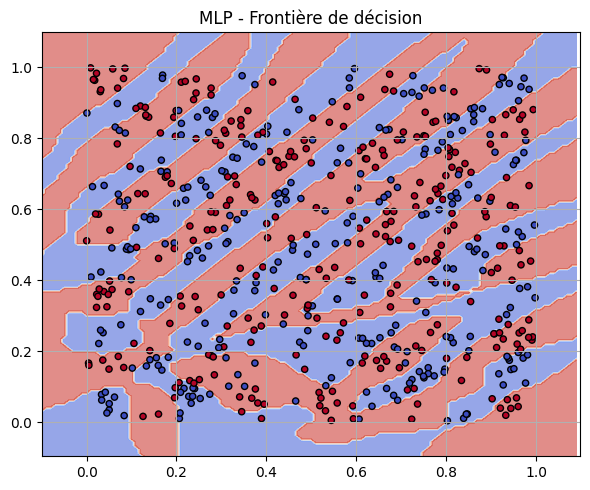

In [60]:
net2 = Sequential(
    Linear(2, 64),
    Tanh(),
    Linear(64, 128),
    Tanh(),
    Linear(128, 64),
    Tanh(),
    Linear(64, 1),
    Sigmoide()
)
loss2 = BCELoss()
losses2 = SGD(net2, loss2, X_train, y_train, eps=0.01, batch_size=10, n_epochs=2000)
y_predtr = net2.forward(X_train);acctr = np.mean((y_predtr > 0.5).astype(int) == y_train);print(f"Accuracy MLP en train : {acctr * 100:.2f}%")

y_pred2 = net2.forward(X_test)
acc2 = np.mean((y_pred2 > 0.5).astype(int) == y_test)
print(f"Accuracy MLP en test : {acc2 * 100:.2f}%")

plt.plot(losses2, label="MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Courbes de coût")
plt.legend()
plt.grid(True)
plt.show()

plot_decision_boundary(net2, X_test, y_test, "MLP - Frontière de décision")

In [ ]:
data = [
    {"Architecture": "2-1", "init_type": "default", "Activation": "Tanh + Sigmoide", "Learning rate": 0.01, "Batch size": 32, "Epochs": 90, "Accuracy train": "50%", "Accuracy test": "50%"},
    {"Architecture": "2-64-1", "init_type": "default", "Activation": "Tanh + Sigmoide", "Learning rate": 0.09, "Batch size": 32, "Epochs": 2000, "Accuracy train": "49.92%", "Accuracy test": "50.83%"},
    {"Architecture": "2-128-64-1", "init_type": "random", "Activation": "Tanh + Sigmoide", "Learning rate": 0.01, "Batch size": 10, "Epochs": 1000, "Accuracy train": "49.92%", "Accuracy test": "50.83%"},
    {"Architecture": "2-128-64-1", "init_type": "1", "Activation": "Tanh + Sigmoide", "Learning rate": 0.01, "Batch size": 10, "Epochs": 1000, "Accuracy train": "52.12%", "Accuracy test": "54.61%"},
    {"Architecture": "2-50-100-50-1", "init_type": "default", "Activation": "Tanh + Sigmoide", "Learning rate": 0.09, "Batch size": 10, "Epochs": 2000, "Accuracy train": "82.17%", "Accuracy test": "78.17%"},
    {"Architecture": "2-64-128-64-1", "init_type": "default", "Activation": "Tanh + Sigmoide", "Learning rate": 0.01, "Batch size": 10, "Epochs": 2000, "Accuracy train": "77.54%", "Accuracy test": "77.00%"},
]


df = pd.DataFrame(data)
display(df)

,Architecture,init_type,Activation,Learning rate,Batch size,Epochs,Accuracy train,Accuracy test
0,2-1,default,Tanh + Sigmoide,0.01,32,90,50%,50%
1,2-64-1,default,Tanh + Sigmoide,0.09,32,2000,49.92%,50.83%
2,2-128-64-1,random,Tanh + Sigmoide,0.01,10,1000,49.92%,50.83%
3,2-128-64-1,1,Tanh + Sigmoide,0.01,10,1000,52.12%,54.61%
4,2-50-100-50-1,default,Tanh + Sigmoide,0.09,10,2000,82.17%,78.17%
5,2-64-128-64-1,default,Tanh + Sigmoide,0.01,10,2000,77.54%,77.00%


### IV. Classification multi-classes

In [61]:
from data import load_usps_from_pkl

In [62]:
X, y = load_usps_from_pkl("usps.pkl")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Epoch 1/300, Loss: 5.8571
Epoch 2/300, Loss: 1.9324
Epoch 3/300, Loss: 1.8227
Epoch 4/300, Loss: 1.7052
Epoch 5/300, Loss: 1.5953
Epoch 6/300, Loss: 1.4859
Epoch 7/300, Loss: 1.3741
Epoch 8/300, Loss: 1.2752
Epoch 9/300, Loss: 1.2637
Epoch 10/300, Loss: 1.1771
Epoch 11/300, Loss: 1.1395
Epoch 12/300, Loss: 1.0487
Epoch 13/300, Loss: 0.9875
Epoch 14/300, Loss: 1.0170
Epoch 15/300, Loss: 0.8950
Epoch 16/300, Loss: 0.8245
Epoch 17/300, Loss: 0.9211
Epoch 18/300, Loss: 0.8224
Epoch 19/300, Loss: 0.7970
Epoch 20/300, Loss: 0.7489
Epoch 21/300, Loss: 0.7478
Epoch 22/300, Loss: 0.7258
Epoch 23/300, Loss: 0.7174
Epoch 24/300, Loss: 0.6881
Epoch 25/300, Loss: 0.7454
Epoch 26/300, Loss: 0.6295
Epoch 27/300, Loss: 0.6134
Epoch 28/300, Loss: 0.6420
Epoch 29/300, Loss: 0.6932
Epoch 30/300, Loss: 0.5751
Epoch 31/300, Loss: 0.6237
Epoch 32/300, Loss: 0.5803
Epoch 33/300, Loss: 0.5800
Epoch 34/300, Loss: 0.5662
Epoch 35/300, Loss: 0.5721
Epoch 36/300, Loss: 0.5340
Epoch 37/300, Loss: 0.5460
Epoch 38/3

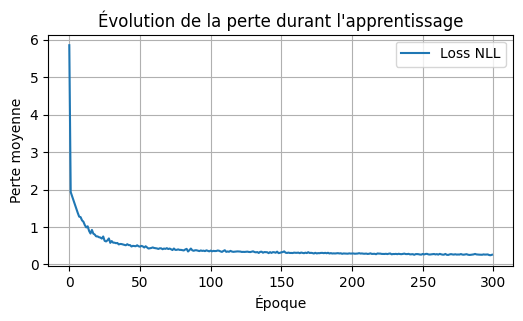

In [63]:
# Définition du modèle 
# Modèle 1 (1 couche cachée seulement)
net = Sequential(
    Linear(256, 128),
    Tanh(),
    Linear(128, 10),
    LogSoftmax()
)

loss = NLLLoss()
losses = SGD(net, loss, X_train, y_train, eps=0.1, batch_size=10, n_epochs=300)

# Evaluation su test
y_predtr = net.forward(X_train)
y_predts = net.forward(X_test) 

#classes prédites sur train
pred_labelstr = np.argmax(y_predtr, axis=1)
true_labelstr = np.argmax(y_train, axis=1)
accuracytr = np.mean(pred_labelstr == true_labelstr)
print(f"Accuracy sur train set : {accuracytr * 100:.2f}%")

#Classes prédites pour le test
pred_labels = np.argmax(y_predts, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracyts = np.mean(pred_labels == true_labels)
print(f"Accuracy sur test set : {accuracyts * 100:.2f}%")

# Courbe de perte
plt.figure(figsize=(6, 3))
plt.plot(losses, label="Loss NLL")
plt.xlabel("Époque")
plt.ylabel("Perte moyenne")
plt.title("Évolution de la perte durant l'apprentissage")
plt.grid()
plt.legend()

Epoch 1/300, Loss: 2.9999
Epoch 2/300, Loss: 2.4035
Epoch 3/300, Loss: 2.0476
Epoch 4/300, Loss: 1.8358
Epoch 5/300, Loss: 1.6163
Epoch 6/300, Loss: 1.4557
Epoch 7/300, Loss: 1.2972
Epoch 8/300, Loss: 1.1828
Epoch 9/300, Loss: 1.1060
Epoch 10/300, Loss: 1.0026
Epoch 11/300, Loss: 0.9464
Epoch 12/300, Loss: 0.8854
Epoch 13/300, Loss: 0.8169
Epoch 14/300, Loss: 0.7899
Epoch 15/300, Loss: 0.7205
Epoch 16/300, Loss: 0.7047
Epoch 17/300, Loss: 0.6967
Epoch 18/300, Loss: 0.6646
Epoch 19/300, Loss: 0.6252
Epoch 20/300, Loss: 0.6095
Epoch 21/300, Loss: 0.6129
Epoch 22/300, Loss: 0.5714
Epoch 23/300, Loss: 0.5673
Epoch 24/300, Loss: 0.5504
Epoch 25/300, Loss: 0.5512
Epoch 26/300, Loss: 0.5238
Epoch 27/300, Loss: 0.5136
Epoch 28/300, Loss: 0.5207
Epoch 29/300, Loss: 0.5131
Epoch 30/300, Loss: 0.4876
Epoch 31/300, Loss: 0.4967
Epoch 32/300, Loss: 0.4796
Epoch 33/300, Loss: 0.4685
Epoch 34/300, Loss: 0.4547
Epoch 35/300, Loss: 0.4697
Epoch 36/300, Loss: 0.4444
Epoch 37/300, Loss: 0.4527
Epoch 38/3

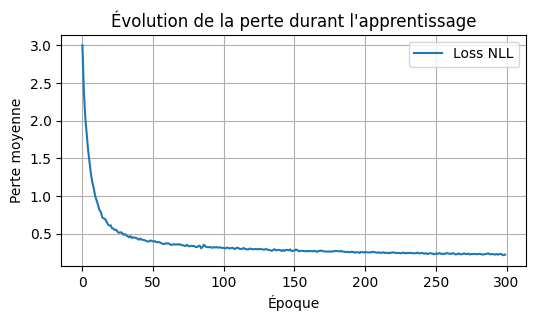

In [64]:
net = Sequential(
    Linear(256, 128),
    Tanh(),
    Linear(128, 10),
    LogSoftmax()
)

loss = NLLLoss()
losses = SGD(net, loss, X_train, y_train, eps=0.01, batch_size=10, n_epochs=300)

# Evaluation su test
y_predtr = net.forward(X_train)
y_predts = net.forward(X_test) 

#classes prédites sur train
pred_labelstr = np.argmax(y_predtr, axis=1)
true_labelstr = np.argmax(y_train, axis=1)
accuracytr = np.mean(pred_labelstr == true_labelstr)
print(f"Accuracy sur train set : {accuracytr * 100:.2f}%")

#Classes prédites pour le test
pred_labels = np.argmax(y_predts, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracyts = np.mean(pred_labels == true_labels)
print(f"Accuracy sur test set : {accuracyts * 100:.2f}%")

# Courbe de perte
plt.figure(figsize=(6, 3))
plt.plot(losses, label="Loss NLL")
plt.xlabel("Époque")
plt.ylabel("Perte moyenne")
plt.title("Évolution de la perte durant l'apprentissage")
plt.grid()
plt.legend()

Rin a commenter, résultats bons, pas de sur-apprentissage.

In [73]:
resultats_classid = [
    {"Architecture": "265-128-10", "init_type": "default", "Activation": "Tanh + LogSoftmax", "Learning rate": 0.1, "Batch size": 10, "Epochs": 300, "Accuracy train": "92.59%", "Accuracy test": "92.30%"},
    {"Architecture": "265-128-10", "init_type": "default", "Activation": "Tanh + LogSoftmax", "Learning rate": 0.01, "Batch size": 10, "Epochs": 300, "Accuracy train": "94.36%", "Accuracy test": "93.74%"}
]

df = pd.DataFrame(resultats_classid); display(df)


,Architecture,init_type,Activation,Learning rate,Batch size,Epochs,Accuracy train,Accuracy test
0,265-128-10,default,Tanh + LogSoftmax,0.10,10,300,92.59%,92.30%
1,265-128-10,default,Tanh + LogSoftmax,0.01,10,300,94.36%,93.74%
